In [20]:
import numpy as np
import networkx as nx

In [21]:
def get_graph(rows, cols):
    graph = nx.grid_2d_graph(rows, cols)  # 5x5 grid
    grid = np.ones((rows, cols))
    
    node_pos = dict((n, (n[0], cols-n[1])) for n in graph.nodes())

    # Delete some random nodes
    for node in graph.copy().nodes:
        if np.random.rand() < 0.2:
            grid[node] = 0
            graph.remove_node(node)

    # Remove nodes that have no connection
    graph.remove_nodes_from(list(nx.isolates(graph)))

    # Draw the graph
    for node in graph.nodes:
        graph.nodes[node]['pos'] = node_pos[node]
    
    nx.draw(graph, pos=node_pos, with_labels=True)
    return graph, grid.T

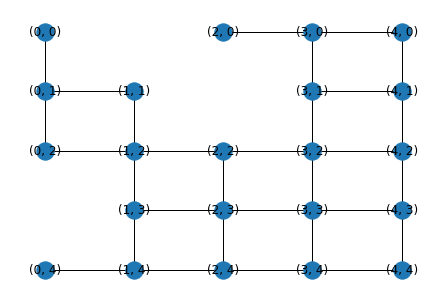

In [24]:
g, gg = get_graph(5, 5)

In [25]:
print(gg)
print(np.rot90(gg, -1))

[[1. 0. 1. 1. 1.]
 [1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


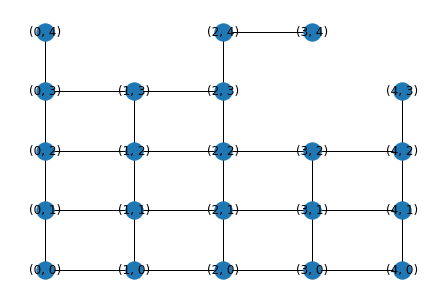

In [15]:
def to_graph(grid):
    grid = np.rot90(grid, -1)
    rows, cols = grid.shape
    graph = nx.grid_2d_graph(rows, cols)  # 5x5 grid
    for node in graph.copy().nodes:
        if grid[node] == 0:
            graph.remove_node(node)
    return graph

ngraph = to_graph(gg)
nx.draw(ngraph, pos={n: n for n in ngraph.nodes}, with_labels=True)

In [16]:
GG = nx.DiGraph(ngraph)

In [17]:
GG.out_edges((0, 0))

OutEdgeDataView([((0, 0), (1, 0)), ((0, 0), (0, 1))])

In [6]:
# paths = [['n93: 0', 'n83: 1', 'n73: 2', 'n63: 3', 'n53: 4', 'n43: 5', 'n42: 6', 'n32: 7', 'n22: 8', 'n21: 9', 'n11: 10', 'n1: 11', 'n1: 11', 'n1: 12', 'n1: 13', 'n1: 14', 'n1: 15', 'n1: 16', 'n1: 17', 'n1: 18', 'n1: 19', 'n1: 20', 'n1: 21', 'n1: 22', 'n1: 23', 'n1: 24', 'n1: 25', 'n1: 26', 'n1: 27', 'n1: 28', 'n1: 29', 'n1: 30', 'n1: 31', 'n1: 32', 'n1: 33', 'n1: 34', 'n1: 35', 'n1: 36', 'n1: 37', 'n1: 38', 'n1: 39', 'n1: 40', 'n1: 41', 'n1: 42', 'n1: 43', 'n1: 44', 'n1: 45', 'n1: 46', 'n1: 47', 'n1: 48', 'n1: 49', 'n1: 50', 'n1: 51', 'n1: 52', 'n1: 53', 'n1: 54', 'n1: 55', 'n1: 56', 'n1: 57', 'n1: 58', 'n1: 59', 'n1: 60', 'n1: 61', 'n1: 62', 'n1: 63', 'n1: 64', 'n1: 65', 'n1: 66', 'n1: 67', 'n1: 68', 'n1: 69', 'n1: 70', 'n1: 71', 'n1: 72', 'n1: 73', 'n1: 74', 'n1: 75', 'n1: 76', 'n1: 77', 'n1: 78', 'n1: 79', 'n1: 80', 'n1: 81', 'n1: 82', 'n1: 83', 'n1: 84', 'n1: 85', 'n1: 86', 'n1: 87', 'n1: 88', 'n1: 89', 'n1: 90', 'n1: 91', 'n1: 92', 'n1: 93', 'n1: 94', 'n1: 95', 'n1: 96', 'n1: 97', 'n1: 98', 'n1: 99', 'n1: 100', 'n1: 101', 'n1: 102', 'n1: 103', 'n1: 104', 'n1: 105', 'n1: 106', 'n1: 107', 'n1: 108', 'n1: 109', 'n1: 110', 'n1: 111', 'n1: 112', 'n1: 113', 'n1: 114', 'n1: 115', 'n1: 116', 'n1: 117', 'n1: 118', 'n1: 119', 'n1: 120', 'n1: 121', 'n1: 122', 'n1: 123', 'n1: 124', 'n1: 125', 'n1: 126', 'n1: 127', 'n1: 128', 'n1: 129', 'n1: 130'], ['n2: 0', 'n1: 1', 'n0: 2', 'n10: 3', 'n20: 4', 'n30: 5', 'n40: 6', 'n41: 7', 'n42: 8', 'n52: 9', 'n62: 10', 'n62: 10', 'n62: 11', 'n62: 12', 'n62: 13', 'n62: 14', 'n62: 15', 'n62: 16', 'n62: 17', 'n62: 18', 'n62: 19', 'n62: 20', 'n62: 21', 'n62: 22', 'n62: 23', 'n62: 24', 'n62: 25', 'n62: 26', 'n62: 27', 'n62: 28', 'n62: 29', 'n62: 30', 'n62: 31', 'n62: 32', 'n62: 33', 'n62: 34', 'n62: 35', 'n62: 36', 'n62: 37', 'n62: 38', 'n62: 39', 'n62: 40', 'n62: 41', 'n62: 42', 'n62: 43', 'n62: 44', 'n62: 45', 'n62: 46', 'n62: 47', 'n62: 48', 'n62: 49', 'n62: 50', 'n62: 51', 'n62: 52', 'n62: 53', 'n62: 54', 'n62: 55', 'n62: 56', 'n62: 57', 'n62: 58', 'n62: 59', 'n62: 60', 'n62: 61', 'n62: 62', 'n62: 63', 'n62: 64', 'n62: 65', 'n62: 66', 'n62: 67', 'n62: 68', 'n62: 69', 'n62: 70', 'n62: 71', 'n62: 72', 'n62: 73', 'n62: 74', 'n62: 75', 'n62: 76', 'n62: 77', 'n62: 78', 'n62: 79', 'n62: 80', 'n62: 81', 'n62: 82', 'n62: 83', 'n62: 84', 'n62: 85', 'n62: 86', 'n62: 87', 'n62: 88', 'n62: 89', 'n62: 90', 'n62: 91', 'n62: 92', 'n62: 93', 'n62: 94', 'n62: 95', 'n62: 96', 'n62: 97', 'n62: 98', 'n62: 99', 'n62: 100', 'n62: 101', 'n62: 102', 'n62: 103', 'n62: 104', 'n62: 105', 'n62: 106', 'n62: 107', 'n62: 108', 'n62: 109', 'n62: 110', 'n62: 111', 'n62: 112', 'n62: 113', 'n62: 114', 'n62: 115', 'n62: 116', 'n62: 117', 'n62: 118', 'n62: 119', 'n62: 120', 'n62: 121', 'n62: 122', 'n62: 123', 'n62: 124', 'n62: 125', 'n62: 126', 'n62: 127', 'n62: 128', 'n62: 129'], ['n90: 0', 'n80: 1', 'n70: 2', 'n60: 3', 'n50: 4', 'n40: 5', 'n41: 6', 'n41: 6', 'n41: 7', 'n41: 8', 'n41: 9', 'n41: 10', 'n41: 11', 'n41: 12', 'n41: 13', 'n41: 14', 'n41: 15', 'n41: 16', 'n41: 17', 'n41: 18', 'n41: 19', 'n41: 20', 'n41: 21', 'n41: 22', 'n41: 23', 'n41: 24', 'n41: 25', 'n41: 26', 'n41: 27', 'n41: 28', 'n41: 29', 'n41: 30', 'n41: 31', 'n41: 32', 'n41: 33', 'n41: 34', 'n41: 35', 'n41: 36', 'n41: 37', 'n41: 38', 'n41: 39', 'n41: 40', 'n41: 41', 'n41: 42', 'n41: 43', 'n41: 44', 'n41: 45', 'n41: 46', 'n41: 47', 'n41: 48', 'n41: 49', 'n41: 50', 'n41: 51', 'n41: 52', 'n41: 53', 'n41: 54', 'n41: 55', 'n41: 56', 'n41: 57', 'n41: 58', 'n41: 59', 'n41: 60', 'n41: 61', 'n41: 62', 'n41: 63', 'n41: 64', 'n41: 65', 'n41: 66', 'n41: 67', 'n41: 68', 'n41: 69', 'n41: 70', 'n41: 71', 'n41: 72', 'n41: 73', 'n41: 74', 'n41: 75', 'n41: 76', 'n41: 77', 'n41: 78', 'n41: 79', 'n41: 80', 'n41: 81', 'n41: 82', 'n41: 83', 'n41: 84', 'n41: 85', 'n41: 86', 'n41: 87', 'n41: 88', 'n41: 89', 'n41: 90', 'n41: 91', 'n41: 92', 'n41: 93', 'n41: 94', 'n41: 95', 'n41: 96', 'n41: 97', 'n41: 98', 'n41: 99', 'n41: 100', 'n41: 101', 'n41: 102', 'n41: 103', 'n41: 104', 'n41: 105', 'n41: 106', 'n41: 107', 'n41: 108', 'n41: 109', 'n41: 110', 'n41: 111', 'n41: 112', 'n41: 113', 'n41: 114', 'n41: 115', 'n41: 116', 'n41: 117', 'n41: 118', 'n41: 119', 'n41: 120', 'n41: 121', 'n41: 122', 'n41: 123', 'n41: 124', 'n41: 125']]
paths = [['n80: 0', 'n70: 1', 'n71: 2', 'n72: 3', 'n73: 4', 'n73: 4', 'n73: 5', 'n73: 6', 'n73: 7', 'n73: 8', 'n73: 9', 'n73: 10', 'n73: 11', 'n73: 12', 'n73: 13', 'n73: 14', 'n73: 15', 'n73: 16', 'n73: 17', 'n73: 18', 'n73: 19', 'n73: 20', 'n73: 21', 'n73: 22', 'n73: 23', 'n73: 24', 'n73: 25', 'n73: 26', 'n73: 27', 'n73: 28', 'n73: 29', 'n73: 30', 'n73: 31', 'n73: 32', 'n73: 33', 'n73: 34', 'n73: 35', 'n73: 36', 'n73: 37', 'n73: 38', 'n73: 39', 'n73: 40', 'n73: 41', 'n73: 42', 'n73: 43', 'n73: 44', 'n73: 45', 'n73: 46', 'n73: 47', 'n73: 48', 'n73: 49', 'n73: 50', 'n73: 51', 'n73: 52', 'n73: 53', 'n73: 54', 'n73: 55', 'n73: 56', 'n73: 57', 'n73: 58', 'n73: 59', 'n73: 60', 'n73: 61', 'n73: 62', 'n73: 63', 'n73: 64', 'n73: 65', 'n73: 66', 'n73: 67', 'n73: 68', 'n73: 69', 'n73: 70', 'n73: 71', 'n73: 72', 'n73: 73', 'n73: 74', 'n73: 75', 'n73: 76', 'n73: 77', 'n73: 78', 'n73: 79', 'n73: 80', 'n73: 81', 'n73: 82', 'n73: 83', 'n73: 84', 'n73: 85', 'n73: 86', 'n73: 87', 'n73: 88', 'n73: 89', 'n73: 90', 'n73: 91', 'n73: 92', 'n73: 93', 'n73: 94', 'n73: 95', 'n73: 96', 'n73: 97', 'n73: 98', 'n73: 99', 'n73: 100', 'n73: 101', 'n73: 102', 'n73: 103', 'n73: 104', 'n73: 105', 'n73: 106', 'n73: 107', 'n73: 108', 'n73: 109', 'n73: 110', 'n73: 111', 'n73: 112', 'n73: 113', 'n73: 114', 'n73: 115', 'n73: 116', 'n73: 117', 'n73: 118', 'n73: 119', 'n73: 120', 'n73: 121', 'n73: 122', 'n73: 123'], 
         ['n21: 0', 'n22: 1', 'n23: 2', 'n24: 3', 'n25: 4', 'n35: 5', 'n36: 6', 'n46: 7', 'n56: 8', 'n66: 9', 'n76: 10', 'n86: 11', 'n96: 12', 'n96: 12', 'n96: 13', 'n96: 14', 'n96: 15', 'n96: 16', 'n96: 17', 'n96: 18', 'n96: 19', 'n96: 20', 'n96: 21', 'n96: 22', 'n96: 23', 'n96: 24', 'n96: 25', 'n96: 26', 'n96: 27', 'n96: 28', 'n96: 29', 'n96: 30', 'n96: 31', 'n96: 32', 'n96: 33', 'n96: 34', 'n96: 35', 'n96: 36', 'n96: 37', 'n96: 38', 'n96: 39', 'n96: 40', 'n96: 41', 'n96: 42', 'n96: 43', 'n96: 44', 'n96: 45', 'n96: 46', 'n96: 47', 'n96: 48', 'n96: 49', 'n96: 50', 'n96: 51', 'n96: 52', 'n96: 53', 'n96: 54', 'n96: 55', 'n96: 56', 'n96: 57', 'n96: 58', 'n96: 59', 'n96: 60', 'n96: 61', 'n96: 62', 'n96: 63', 'n96: 64', 'n96: 65', 'n96: 66', 'n96: 67', 'n96: 68', 'n96: 69', 'n96: 70', 'n96: 71', 'n96: 72', 'n96: 73', 'n96: 74', 'n96: 75', 'n96: 76', 'n96: 77', 'n96: 78', 'n96: 79', 'n96: 80', 'n96: 81', 'n96: 82', 'n96: 83', 'n96: 84', 'n96: 85', 'n96: 86', 'n96: 87', 'n96: 88', 'n96: 89', 'n96: 90', 'n96: 91', 'n96: 92', 'n96: 93', 'n96: 94', 'n96: 95', 'n96: 96', 'n96: 97', 'n96: 98', 'n96: 99', 'n96: 100', 'n96: 101', 'n96: 102', 'n96: 103', 'n96: 104', 'n96: 105', 'n96: 106', 'n96: 107', 'n96: 108', 'n96: 109', 'n96: 110', 'n96: 111', 'n96: 112', 'n96: 113', 'n96: 114', 'n96: 115', 'n96: 116', 'n96: 117', 'n96: 118', 'n96: 119', 'n96: 120', 'n96: 121', 'n96: 122', 'n96: 123', 'n96: 124', 'n96: 125', 'n96: 126', 'n96: 127', 'n96: 128', 'n96: 129', 'n96: 130', 'n96: 131'], 
         ['n24: 0', 'n25: 1', 'n35: 2', 'n36: 3', 'n46: 4', 'n56: 5', 'n56: 5', 'n56: 6', 'n56: 7', 'n56: 8', 'n56: 9', 'n56: 10', 'n56: 11', 'n56: 12', 'n56: 13', 'n56: 14', 'n56: 15', 'n56: 16', 'n56: 17', 'n56: 18', 'n56: 19', 'n56: 20', 'n56: 21', 'n56: 22', 'n56: 23', 'n56: 24', 'n56: 25', 'n56: 26', 'n56: 27', 'n56: 28', 'n56: 29', 'n56: 30', 'n56: 31', 'n56: 32', 'n56: 33', 'n56: 34', 'n56: 35', 'n56: 36', 'n56: 37', 'n56: 38', 'n56: 39', 'n56: 40', 'n56: 41', 'n56: 42', 'n56: 43', 'n56: 44', 'n56: 45', 'n56: 46', 'n56: 47', 'n56: 48', 'n56: 49', 'n56: 50', 'n56: 51', 'n56: 52', 'n56: 53', 'n56: 54', 'n56: 55', 'n56: 56', 'n56: 57', 'n56: 58', 'n56: 59', 'n56: 60', 'n56: 61', 'n56: 62', 'n56: 63', 'n56: 64', 'n56: 65', 'n56: 66', 'n56: 67', 'n56: 68', 'n56: 69', 'n56: 70', 'n56: 71', 'n56: 72', 'n56: 73', 'n56: 74', 'n56: 75', 'n56: 76', 'n56: 77', 'n56: 78', 'n56: 79', 'n56: 80', 'n56: 81', 'n56: 82', 'n56: 83', 'n56: 84', 'n56: 85', 'n56: 86', 'n56: 87', 'n56: 88', 'n56: 89', 'n56: 90', 'n56: 91', 'n56: 92', 'n56: 93', 'n56: 94', 'n56: 95', 'n56: 96', 'n56: 97', 'n56: 98', 'n56: 99', 'n56: 100', 'n56: 101', 'n56: 102', 'n56: 103', 'n56: 104', 'n56: 105', 'n56: 106', 'n56: 107', 'n56: 108', 'n56: 109', 'n56: 110', 'n56: 111', 'n56: 112', 'n56: 113', 'n56: 114', 'n56: 115', 'n56: 116', 'n56: 117', 'n56: 118', 'n56: 119', 'n56: 120', 'n56: 121', 'n56: 122', 'n56: 123', 'n56: 124']]
actual_paths = []
for path in paths:
    p = []
    for node in path:
        if len(p) > 0 and p[-1] == node:
            break
        p.append(node)
    actual_paths.append(p)

for path in actual_paths:
    print(path)

['n80: 0', 'n70: 1', 'n71: 2', 'n72: 3', 'n73: 4']
['n21: 0', 'n22: 1', 'n23: 2', 'n24: 3', 'n25: 4', 'n35: 5', 'n36: 6', 'n46: 7', 'n56: 8', 'n66: 9', 'n76: 10', 'n86: 11', 'n96: 12']
['n24: 0', 'n25: 1', 'n35: 2', 'n36: 3', 'n46: 4', 'n56: 5']


In [2]:
def conflict(path, path2):
    for node in path:
        if node in path2:
            return True
    return False

print(conflict(actual_paths[0], actual_paths[1]))
print(conflict(actual_paths[1], actual_paths[2]))
print(conflict(actual_paths[0], actual_paths[2]))
            

False
False
False


In [5]:
actual_paths = [['n6: 0', 'n5: 1', 'n15: 2', 'n25: 3', 'n35: 4', 'n45: 5', 'n55: 6'], 
 ['n96: 0', 'n95: 1', 'n85: 2', 'n75: 3', 'n65: 4', 'n55: 5', 'n56: 6', 'n46: 7', 'n45: 8', 'n35: 9', 'n25: 10'], 
 ['n8: 0', 'n7: 1', 'n6: 2', 'n5: 3', 'n15: 4', 'n25: 5', 'n35: 6']]


print(conflict(actual_paths[0], actual_paths[1]))
print(conflict(actual_paths[1], actual_paths[2]))
print(conflict(actual_paths[0], actual_paths[2]))

False
False
False
